In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\Collisions.csv')

In [87]:
df['STATUS'].value_counts()

Matched      194840
Unmatched     26426
Name: STATUS, dtype: int64

In [88]:
df.head(2)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N


In [89]:
df.drop(columns={"X","Y","OBJECTID","INTKEY","INCKEY","COLDETKEY","SDOT_COLCODE","SDOT_COLDESC","ST_COLDESC","SEVERITYDESC","REPORTNO","LOCATION","EXCEPTRSNCODE","EXCEPTRSNDESC", "INCDATE","INCDTTM","JUNCTIONTYPE","SDOTCOLNUM","SEGLANEKEY","CROSSWALKKEY","ST_COLCODE","PEDROWNOTGRNT","INATTENTIONIND","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT","PERSONCOUNT","INJURIES","SERIOUSINJURIES","FATALITIES","UNDERINFL","HITPARKEDCAR"}, inplace=True)
df.head(5)

,STATUS,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Matched,Intersection,2,Pedestrian,Clear,Dry,Daylight,NaN
1,Matched,Intersection,2,Angles,Raining,Wet,Dark - Street Lights On,NaN
2,Matched,Block,1,Sideswipe,Clear,Dry,Daylight,NaN
3,Matched,Intersection,1,Left Turn,Raining,Wet,Dark - Street Lights On,NaN
4,Unmatched,Block,0,NaN,NaN,NaN,NaN,NaN


In [90]:
indexName=df[(df['STATUS']=='Unmatched')].index
df.drop(indexName, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,STATUS,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Matched,Intersection,2,Pedestrian,Clear,Dry,Daylight,NaN
1,Matched,Intersection,2,Angles,Raining,Wet,Dark - Street Lights On,NaN
2,Matched,Block,1,Sideswipe,Clear,Dry,Daylight,NaN
3,Matched,Intersection,1,Left Turn,Raining,Wet,Dark - Street Lights On,NaN
4,Matched,Block,1,Other,Clear,Dry,Dark - Street Lights On,NaN


In [91]:
indexname1=df[(df['SEVERITYCODE']=='0')].index
df.drop(indexname1, axis=0, inplace=True)
indexname2=df[(df['WEATHER']=='Unknown')].index
df.drop(indexname2, axis=0, inplace=True)
indexname3=df[(df['ROADCOND']=='Unknown')].index
df.drop(indexname3, axis=0, inplace=True)
indexname4=df[(df['LIGHTCOND']=='Unknown')].index
df.drop(indexname4, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [92]:
df['WEATHER'].value_counts()

Clear                       112282
Raining                      33631
Overcast                     27793
Snowing                        849
Fog/Smog/Smoke                 563
Other                          276
Sleet/Hail/Freezing Rain       114
Blowing Sand/Dirt               48
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [93]:
df["STATUS"].value_counts()

Matched    175787
Name: STATUS, dtype: int64

In [94]:
df.dropna(subset=['COLLISIONTYPE'], axis=0, inplace=True)
df['SPEEDING'].replace(np.nan, "N", inplace=True)
df.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df.dropna(subset=['SEVERITYCODE'],axis=0,inplace=True)
df.dropna(subset=['ROADCOND'], axis=0, inplace=True)
df.dropna(subset=['WEATHER'], axis=0, inplace=True)
df.drop(columns={"STATUS"}, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(174636, 7)

In [95]:
df.head(20)

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,Pedestrian,Clear,Dry,Daylight,N
1,Intersection,2,Angles,Raining,Wet,Dark - Street Lights On,N
2,Block,1,Sideswipe,Clear,Dry,Daylight,N
3,Intersection,1,Left Turn,Raining,Wet,Dark - Street Lights On,N
4,Block,1,Other,Clear,Dry,Dark - Street Lights On,N
5,Intersection,1,Other,Clear,Dry,Daylight,N
6,Block,2,Pedestrian,Clear,Dry,Dark - Street Lights On,N
7,Block,1,Angles,Clear,Dry,Daylight,N
8,Intersection,1,Angles,Overcast,Dry,Daylight,N
9,Intersection,2,Pedestrian,Clear,Dry,Daylight,N


In [96]:
missingdata= df.isnull()

In [97]:
for column in missingdata.columns.values.tolist():
    print(column)
    print(missingdata[column].value_counts())
    print("")

ADDRTYPE
False    174636
Name: ADDRTYPE, dtype: int64

SEVERITYCODE
False    174636
Name: SEVERITYCODE, dtype: int64

COLLISIONTYPE
False    174636
Name: COLLISIONTYPE, dtype: int64

WEATHER
False    174636
Name: WEATHER, dtype: int64

ROADCOND
False    174636
Name: ROADCOND, dtype: int64

LIGHTCOND
False    174636
Name: LIGHTCOND, dtype: int64

SPEEDING
False    174636
Name: SPEEDING, dtype: int64



Text(0, 0.5, 'Weather Condition')

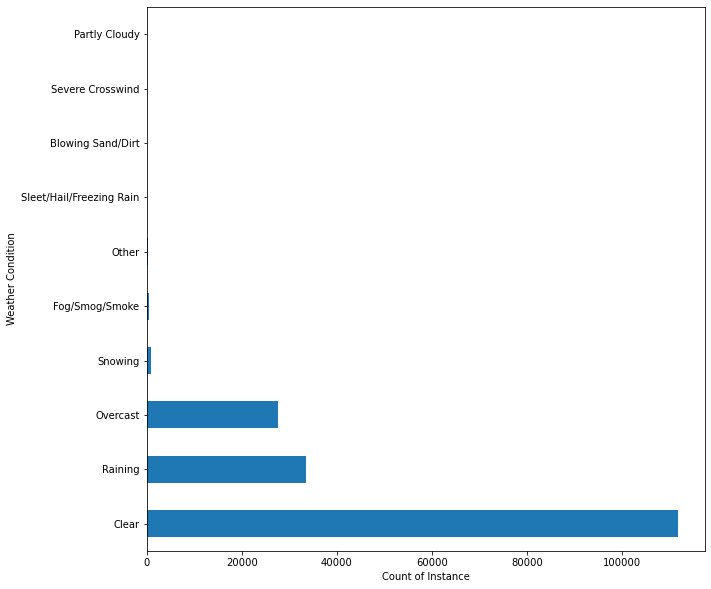

In [99]:
df['WEATHER'].value_counts().plot(kind='barh', figsize=(10,10))
plt.xlabel('Count of Instance')
plt.ylabel('Weather Condition')

Text(0, 0.5, 'Severity Count')

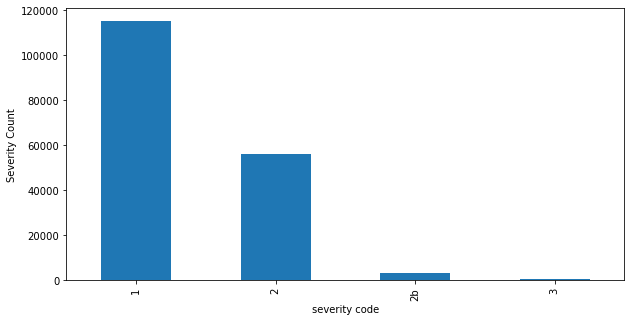

In [100]:
df['SEVERITYCODE'].value_counts().plot(kind='bar',figsize=(10,5))
plt.xlabel('severity code')
plt.ylabel('Severity Count')

Text(0.5, 0, 'Road condition')

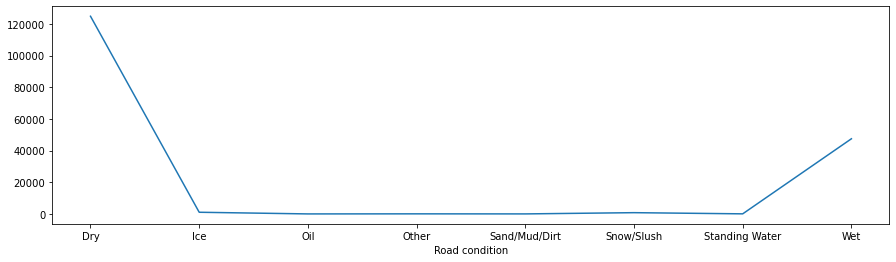

In [139]:
plt.figure(figsize=(15,4))
plt.plot(df['ROADCOND'].value_counts().sort_index())
plt.xlabel('Road condition')

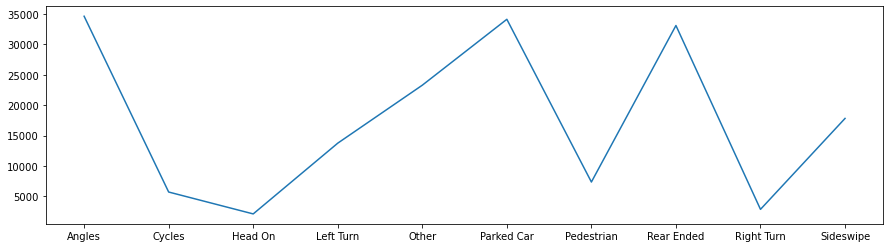

In [102]:
plt.figure(figsize=(15,4))
plt.plot(df['COLLISIONTYPE'].value_counts().sort_index())

In [103]:
df['SEVERITYCODE'].replace("2b", 4, inplace=True)
df['SEVERITYCODE'].value_counts()

1    115090
2     56234
4      2977
3       335
Name: SEVERITYCODE, dtype: int64

In [104]:
df['SEVERITYCODE']=df['SEVERITYCODE'].astype('int')

In [114]:
from sklearn.preprocessing import LabelEncoder
number= LabelEncoder()
df['ADDRTYPECODE']= number.fit_transform(df['ADDRTYPE'].astype('str'))
df['ADDRTYPECODE'].value_counts()

1    110416
2     63615
0       605
Name: ADDRTYPECODE, dtype: int64

In [105]:
df['WEATHERCODE']= number.fit_transform(df['WEATHER'].astype('str'))
df['WEATHERCODE'].value_counts()

1    111687
6     33458
4     27641
9       839
2       557
3       263
8       113
0        43
7        26
5         9
Name: WEATHERCODE, dtype: int64

In [106]:
df['LIGHTCONDCODE']= number.fit_transform(df['LIGHTCOND'].astype('str'))
df['LIGHTCONDCODE'].value_counts()

5    115323
2     48198
6      5793
4      2510
0      1443
1      1149
7       202
3        18
Name: LIGHTCONDCODE, dtype: int64

In [107]:
df['ROADCONDCODE']= number.fit_transform(df['ROADCOND'].astype('str'))
df['ROADCONDCODE'].value_counts()

0    124836
7     47496
1      1109
5       850
3       109
6       108
4        67
2        61
Name: ROADCONDCODE, dtype: int64

In [108]:
df['COLLISIONTYPE'].value_counts()

Angles        34603
Parked Car    34101
Rear Ended    33078
Other         23269
Sideswipe     17808
Left Turn     13741
Pedestrian     7355
Cycles         5709
Right Turn     2861
Head On        2111
Name: COLLISIONTYPE, dtype: int64

In [109]:
df['COLLISIONTYPECODE']= number.fit_transform(df['COLLISIONTYPE'].astype('str'))
df['COLLISIONTYPECODE'].value_counts()

0    34603
5    34101
7    33078
4    23269
9    17808
3    13741
6     7355
1     5709
8     2861
2     2111
Name: COLLISIONTYPECODE, dtype: int64

In [110]:
df.dtypes

ADDRTYPE             object
SEVERITYCODE          int32
COLLISIONTYPE        object
WEATHER              object
ROADCOND             object
LIGHTCOND            object
SPEEDING             object
WEATHERCODE           int32
LIGHTCONDCODE         int32
ROADCONDCODE          int32
COLLISIONTYPECODE     int32
dtype: object

In [111]:
df['SPEEDING'].replace("N",0, inplace=True)
df['SPEEDING'].replace("Y",1, inplace=True)

In [112]:
df.dtypes

ADDRTYPE             object
SEVERITYCODE          int32
COLLISIONTYPE        object
WEATHER              object
ROADCOND             object
LIGHTCOND            object
SPEEDING              int64
WEATHERCODE           int32
LIGHTCONDCODE         int32
ROADCONDCODE          int32
COLLISIONTYPECODE     int32
dtype: object

In [115]:
X=df[['COLLISIONTYPECODE','ADDRTYPECODE','WEATHERCODE','ROADCONDCODE','LIGHTCONDCODE','SPEEDING']]

In [123]:
y=df['SEVERITYCODE'].values
y[0:5]

array([2, 2, 1, 1, 1])

In [124]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (139708, 6) (139708,)
Test set: (34928, 6) (34928,)


In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [127]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65222744, 0.68263284, 0.6684322 , 0.70035502, 0.68386395,
       0.69600321, 0.6868415 , 0.69626088, 0.68864521])

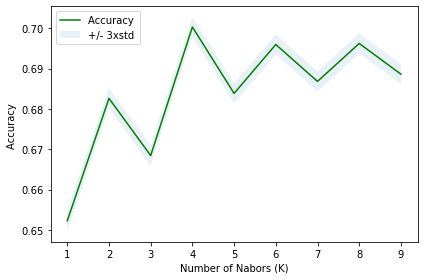

In [128]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [129]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7003550160329821 with k= 4


In [130]:
knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)

knn_model

KNeighborsClassifier(n_neighbors=4)

In [131]:
knn_yhat = knn_model.predict(X_test)

In [132]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [133]:
yhatSVC = clf.predict(X_test)
yhatSVC [0:5]

array([1, 1, 1, 1, 1])

In [134]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [135]:
f1KNN = round(f1_score(y_test, knn_yhat, average = 'weighted'), 2)
ftestSVC = round(f1_score(y_test, yhatSVC, average = 'weighted'), 2)
f1_list = [f1KNN, ftestSVC]
f1_list

[0.65, 0.58]

In [137]:
jscoreKNN = round(jaccard_score(y_test, knn_yhat,average='weighted'), 2)
jscoreSVC = round(jaccard_score(y_test, yhatSVC, average='weighted'), 2)
jscorelist=[jscoreKNN,jscoreSVC]
jscorelist

[0.52, 0.47]

In [138]:
columns = ['KNN',  'SVM']
index = ['Jaccard', 'F1-score']
accuracy_df = pd.DataFrame([jscorelist, f1_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score
KNN,0.52,0.65
SVM,0.47,0.58
